In [28]:
#some code from https://docs.mesastar.org/en/latest/using_mesa/output.html

In [11]:
# imports
import mesa_reader as mr
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table, hstack, unique, vstack

In [3]:
# Plotting properties
from matplotlib import rc
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['mathtext.default'] = 'regular'
labels_font = {'size':'20'} 

Text(0, 0.5, 'Temperature')

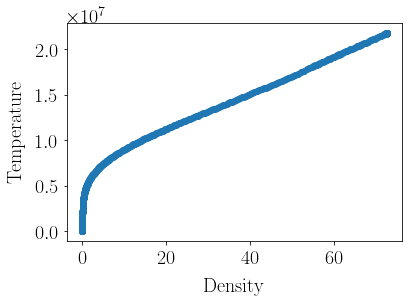

In [4]:
# load entire LOG directory information
l = mr.MesaLogDir('./tutorial/LOGS')
# grab the last profile
p = l.profile_data()

# this works even if you only have logRho and logT!
plt.scatter(p.Rho, p.T)
plt.xlabel("Density")
plt.ylabel("Temperature")

In [7]:
h.header_names

['version_number',
 'compiler',
 'build',
 'MESA_SDK_version',
 'math_backend',
 'date',
 'burn_min1',
 'burn_min2',
 'msun',
 'rsun',
 'lsun']

In [8]:
p.header_names

['model_number',
 'num_zones',
 'initial_mass',
 'initial_z',
 'star_age',
 'time_step',
 'Teff',
 'photosphere_L',
 'photosphere_r',
 'center_eta',
 'center_h1',
 'center_he3',
 'center_he4',
 'center_c12',
 'center_n14',
 'center_o16',
 'center_ne20',
 'star_mass',
 'star_mdot',
 'star_mass_h1',
 'star_mass_he3',
 'star_mass_he4',
 'star_mass_c12',
 'star_mass_n14',
 'star_mass_o16',
 'star_mass_ne20',
 'he_core_mass',
 'co_core_mass',
 'fe_core_mass',
 'neutron_rich_core_mass',
 'dynamic_time',
 'kh_timescale',
 'nuc_timescale',
 'power_nuc_burn',
 'power_h_burn',
 'power_he_burn',
 'power_neu',
 'burn_min1',
 'burn_min2',
 'time_seconds',
 'version_number',
 'compiler',
 'build',
 'MESA_SDK_version',
 'math_backend',
 'date',
 'msun',
 'rsun',
 'lsun']

In [9]:
p.initial_mass, p.star_mass, p.initial_z, p.star_mass_h1, p.lsun, p.photosphere_r, p.photosphere_L

(2.0,
 2.0,
 0.01,
 1.459343386293658,
 3.828e+33,
 1.4751471745104892,
 19.669070174378152)

In [5]:
Ms = 1.989e33
Rs = 6.96e10
Ls = 3.826e33

#get luminosity
p_lum = np.zeros(len(p.mass))
m0=p.mass[-1]
p_lum[-1] = ((p.pp[-1]+p.cno[-1])*m0)
for i in range(len(p.mass)-2,-1,-1):
    p_lum[i] = (p.pp[i]+p.cno[i])*(p.mass[i]-p.mass[i+1])*Ms + p_lum[i+1]

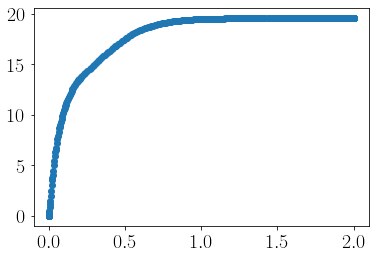

In [6]:
plt.scatter(p.mass, (p_lum)/Ls)

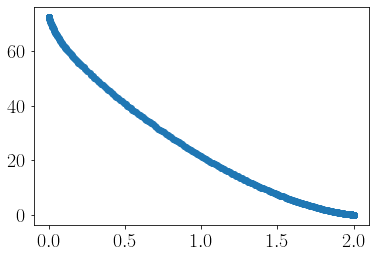

In [7]:
plt.scatter(p.mass, p.Rho)

21731107.075397883


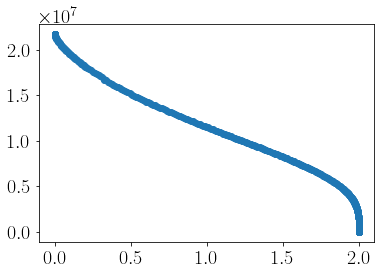

In [8]:
plt.scatter(p.mass, p.T)
print(p.T.max())

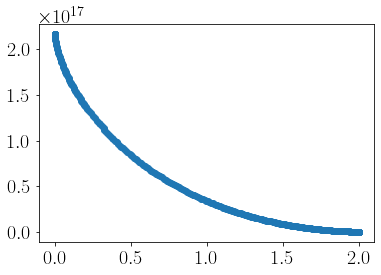

In [9]:
plt.scatter(p.mass, 10**p.logP)

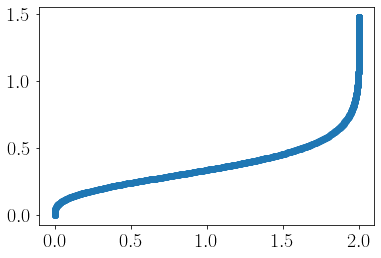

In [10]:
plt.scatter(p.mass, p.R)

In [12]:
#Import best fit results from stellar calc
stel_calc = Table(fits.getdata('final_table3.fits'))
stel_calc

Mass ($M_\odot$),Radius ($R_\odot$),Density ($g/cm^3$),Temperature (K),Pressure ($dyn/cm^2$),Luminosity ($L_\odot$),Nuclear energy generation rate $\epsilon$,Opacity,$\nabla_{ad}$,$\nabla$,Radiative/Convective
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str10
5.027652086475616e-39,4.573920252998607e-14,73.99764643905195,20176056.334424842,2.006784694770129e+17,7.281774769712973e-37,278.60070268922095,0.6324288790611587,0.4,0.8415885946364497,Convective
1.6438069119330208e-38,6.760126955401791e-14,73.99764643905195,20176056.334424842,2.006784694770129e+17,2.380799524651396e-36,278.60070268922095,0.6324288790611587,0.4,0.8415885946364553,Convective
3.313942768648584e-38,8.557494950735273e-14,73.99764643905195,20176056.334424842,2.006784694770129e+17,4.799732444878522e-36,278.60070268922095,0.6324288790611587,0.4,0.8415885946364566,Convective
1.1024752115746948e-37,1.2732725047464678e-13,73.99764643905195,20176056.334424842,2.006784694770129e+17,1.5967644621778646e-35,278.60070268922095,0.6324288790611587,0.4,0.8415885946364573,Convective
2.1778097975240264e-37,1.6018475995195356e-13,73.99764643905195,20176056.334424842,2.006784694770129e+17,3.1542199348883346e-35,278.60070268922095,0.6324288790611587,0.4,0.8415885946364574,Convective
7.692849337985694e-37,2.427835492792762e-13,73.99764643905195,20176056.334424842,2.006784694770129e+17,1.1141899887471378e-34,278.60070268922095,0.6324288790611587,0.4,0.8415885946364576,Convective
...,...,...,...,...,...,...,...,...,...,...
1.9999999999834266,1.4069358830779681,4.0376010366834655e-09,15006.866008788227,8255.345685813892,12.16156016138218,2.484934707202939e-61,28.63480412477694,0.4,0.21502513453149055,Radiative
1.999999999989797,1.4073761180554376,2.8751602327965775e-09,13636.577026464802,5346.262223660613,12.16156016138218,2.2122090144392785e-63,31.934210984352404,0.4,0.22777430698040646,Radiative


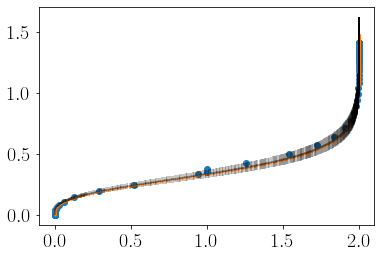

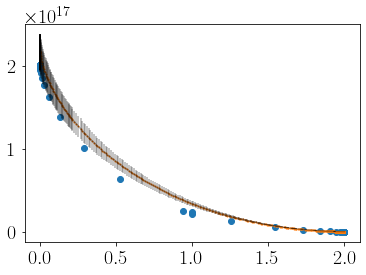

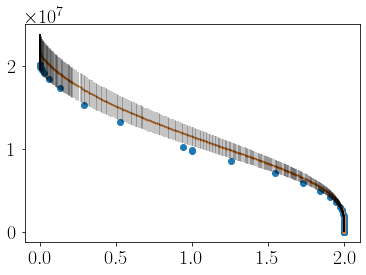

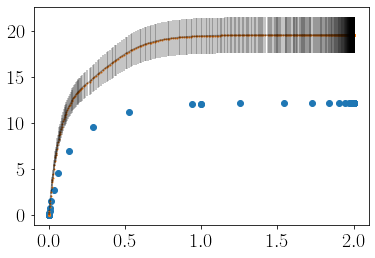

In [13]:
#plot comparison of MESA and stellar calculation best fit
plt.scatter(stel_calc['Mass ($M_\\odot$)'], stel_calc['Radius ($R_\\odot$)'])
plt.scatter(p.mass, p.R, 1)
R1err = 0.1 * np.ones_like(p.R)*p.R
plt.errorbar(p.mass, p.R, yerr=R1err, color='k',alpha=0.3)
plt.show()

plt.scatter(stel_calc['Mass ($M_\\odot$)'], stel_calc['Pressure ($dyn/cm^2$)'])
plt.scatter(p.mass, 10**p.logP, 1)
P1err = 0.1 * np.ones_like(p.P)*p.P
plt.errorbar(p.mass, p.P, yerr=P1err, color='k',alpha=0.3)
plt.show()

plt.scatter(stel_calc['Mass ($M_\\odot$)'], stel_calc['Temperature (K)'])
plt.scatter(p.mass, p.T, 1)
T1err = 0.1 * np.ones_like(p.T)*p.T
plt.errorbar(p.mass, p.T, yerr=T1err, color='k',alpha=0.3)
plt.show()


plt.scatter(stel_calc['Mass ($M_\\odot$)'], stel_calc['Luminosity ($L_\\odot$)'])
plt.scatter(p.mass, p_lum/Ls, 1)
L1err = 0.1 * np.ones_like(p_lum)*p_lum/Ls
plt.errorbar(p.mass, p_lum/Ls, yerr=L1err, color='k',alpha=0.3)
plt.show()

# plt.scatter(stel_calc['Mass ($M_\\odot$)'], stel_calc['Density ($g/cm^3$)'])
# plt.scatter(p.mass, p.Rho, 1)
# plt.show()

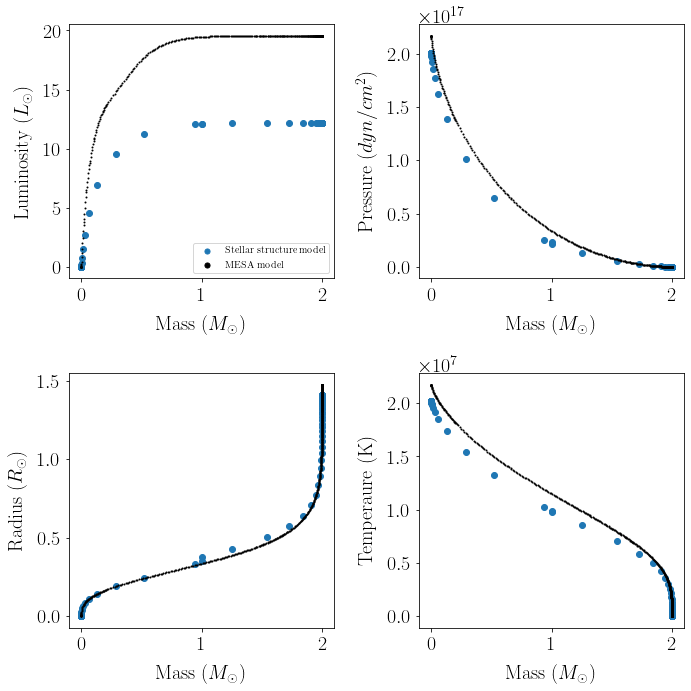

In [39]:
#Plot L,P,R,T as function of mass for best fit solution
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

mesa_color='k'
ax1.scatter(stel_calc['Mass ($M_\\odot$)'], stel_calc['Luminosity ($L_\\odot$)'], label='Stellar structure model')
ax1.scatter(p.mass, p_lum/Ls, 1, label='MESA model', color=mesa_color)
ax1.set_ylabel(r'Luminosity ($L_\odot$)')
ax1.set_xlabel(r'Mass ($M_\odot$)')
lgnd = ax1.legend()
lgnd.legendHandles[0]._sizes = [26]
lgnd.legendHandles[1]._sizes = [26]

ax2.scatter(stel_calc['Mass ($M_\\odot$)'], stel_calc['Pressure ($dyn/cm^2$)'])
ax2.scatter(p.mass, 10**p.logP, 1, color=mesa_color)
ax2.set_ylabel(r'Pressure ($dyn/cm^2$)')
ax2.set_xlabel(r'Mass ($M_\odot$)')

ax3.scatter(stel_calc['Mass ($M_\\odot$)'], stel_calc['Radius ($R_\\odot$)'])
ax3.scatter(p.mass, p.R, 1, color=mesa_color)
ax3.set_ylabel(r'Radius ($R_\odot$)')
ax3.set_xlabel(r'Mass ($M_\odot$)')

ax4.scatter(stel_calc['Mass ($M_\\odot$)'], stel_calc['Temperature (K)'])
ax4.scatter(p.mass, p.T, 1, color=mesa_color)
ax4.set_ylabel('Temperaure (K)')
ax4.set_xlabel(r'Mass ($M_\odot$)')

fig.tight_layout()

plt.savefig('./figs/mesa_comp.png',bbox_inches='tight')
plt.show()

In [15]:
#best fit values from stellar calulation
T_c,P_c,L_star,R_star=20176056.33442483, 2.006784694770129e17, 4.653012917744822e34, 98057931957.24261
calc_best_fit = np.array([T_c,P_c,L_star/Ls,R_star/Rs])
print(calc_best_fit)

[2.01760563e+07 2.00678469e+17 1.21615602e+01 1.40887833e+00]


In [16]:
#values from MESA
mesa_fit = np.array([np.max(p.T), np.max(10**p.logP) , p.photosphere_L, np.max(p.photosphere_r)])
print(mesa_fit)

[2.17311071e+07 2.16974941e+17 1.96690702e+01 1.47514717e+00]


In [17]:
#Print errors
100*np.abs(calc_best_fit - mesa_fit)/mesa_fit

array([ 7.15587446,  7.51076185, 38.16911499,  4.49235459])